In [178]:
import datetime

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from wordcloud import WordCloud

In [2]:
np.random.seed(41 * 41)

In [3]:
%%time
df = pd.read_csv('../data/parsedv5.csv')

CPU times: user 10.2 s, sys: 1.47 s, total: 11.6 s
Wall time: 11.7 s


In [156]:
MAX_FEATURES = 1000
cv = CountVectorizer(max_df=0.2,
                     max_features=MAX_FEATURES,
                     lowercase=True,
                     token_pattern='[a-z]{3}[a-z]*',
                     stop_words='english')

In [157]:
%%time
dtm = cv.fit_transform(df['text'])
print(dtm.shape)

(21336, 1000)
CPU times: user 53 s, sys: 901 ms, total: 53.9 s
Wall time: 54.4 s


In [158]:
print(len(cv.get_feature_names()))
print(cv.get_feature_names()[:20])

1000
['ability', 'absent', 'absolute', 'acceptance', 'access', 'accident', 'accounts', 'accused', 'acres', 'activities', 'activity', 'address', 'addressed', 'adjudged', 'adjudication', 'administrative', 'administrator', 'admiralty', 'admission', 'adopt']


In [159]:
libs = ['Fortas' ,'Cardozo' ,'Kagan' ,'Murphy' ,'Sotomayor' ,'Rutledge' ,'Douglas']
cons = ['Scalia' ,'Whittaker' ,'Thomas' ,'Sutherland' ,'McReynolds' ,'Gorsuch' ,'Butler' ,'Alito' ,'Burger' ,'Rehnquist']

lrows = np.array(df["last"].isin(libs), dtype=np.float)
crows = np.array(df["last"].isin(cons), dtype=np.float)
lrows.sum(), crows.sum()

(833.0, 1967.0)

In [160]:
lfreqs = dtm.T * lrows
cfreqs = dtm.T * crows

In [161]:
lprobs = lfreqs / lfreqs.sum()
cprobs = cfreqs / cfreqs.sum()

In [162]:
ldict = {}
cdict = {}
for i, word in enumerate(cv.get_feature_names()):
    ldict[word] = lprobs[i]
    cdict[word] = cprobs[i]

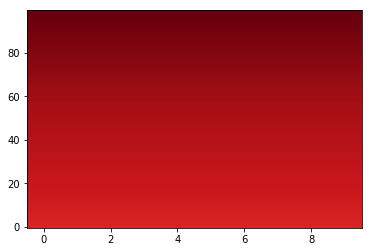

In [188]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        'trunc({name},{a:.2f},{b:.2f})'.format(
            name=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

blue_cm = truncate_colormap(plt.cm.get_cmap('Blues'), 0.7, 1)
red_cm = truncate_colormap(plt.cm.get_cmap('Reds'), 0.7, 1)
a = np.outer(np.arange(0,1,0.01),np.ones(10))
plt.imshow(a,aspect='auto',cmap=blue_cm,origin="lower")
plt.imshow(a,aspect='auto',cmap=red_cm,origin="lower")

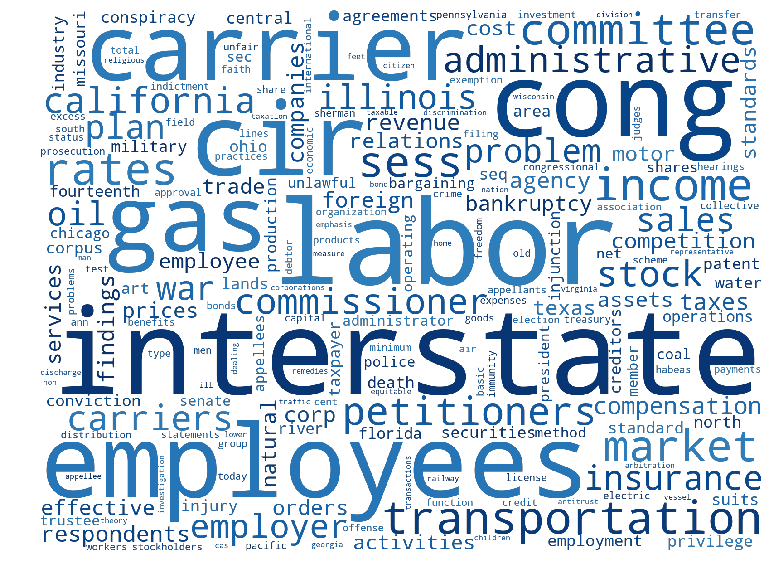

In [189]:
plt.figure(figsize=(20,10))
plt.imshow(WordCloud(mode="RGBA", background_color=None,
                     width=1600,
                     height=1200,
                     colormap=blue_cm
                    ).generate_from_frequencies(ldict))
plt.axis('off')
plt.savefig('libs.png', bbox_inches='tight', dpi=300, transparent=True)

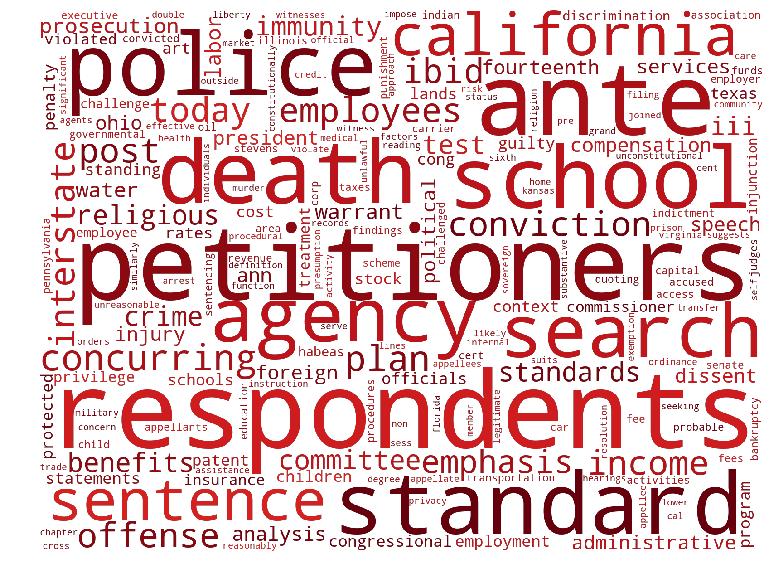

In [190]:
plt.figure(figsize=(20,10))
plt.imshow(WordCloud(mode="RGBA", background_color=None,
                     width=1600,
                     height=1200,
                     colormap=red_cm
                    ).generate_from_frequencies(cdict))
plt.axis('off')
plt.savefig('cons.png', bbox_inches='tight', dpi=300, transparent=True)